---

## *2021-02-02*

---

# 04-1 로지스틱 회귀

로지스틱 회귀, 다중 분류, 시그모이드 함수, 소프트맥스 함수

- 목표: 로지스틱 회귀 알고리즘을 배우고 이진 분류 문제에서 클래스 확률을 예측한다

## 럭키백의 확률

- 일정한 확률로 생선을 획득할 수 있는 럭키백 기획

- 길이, 톺이, 두께, 대각선길이, 무게

1. k-최근접 이웃 분류기로 럭키백에 들어간 생선의 확률 계산

2. k-최근접 이웃 분류기도 클래스 확률을 계산해 제공함

### 데이터 준비하기

In [5]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head() #front 5 rows

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

- to_numpy() 메서드로 넘파이 배열로 바꾸어 fisn_input에 저장함

In [4]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
fish_target = fish['Species'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

---

### k-최근접 이웃 분류기의 확률 예측

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- **다중 분류**: 타깃 데이터에 2개 이상의 클래스가 포함된 문제


- 사이킷런에서는 문자열로 된 타깃값을 그대로 사용할 수 있음


- *주의 : 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨짐*


- KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장되어 있음

In [11]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [12]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [14]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [15]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀

- **Sigmoid function** & **Logistic function**

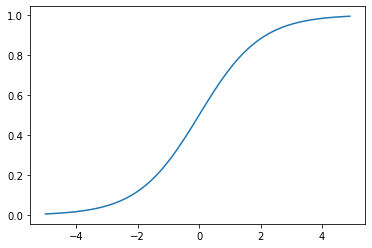

In [16]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.show()

- 이진 분류일 경우 시그모이드 함수의 출력이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단

### 로지스틱 회귀로 이진 분류 수행하기

- **Boolean Indexing**

In [17]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True,  False, True, False, False]])

['A' 'C']


In [19]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [21]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [22]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [23]:
print(lr.classes_)

['Bream' 'Smelt']


In [24]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [25]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [26]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기

- max_iter 매개변수에서 반복 횟수를 지정하며 기본값은 100


- LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제함


- 규제를 제어하는 매개변수는 'C' ('C'는 alpha와 반대로 작을수록 규제가 커짐) (기본값은 '1')

In [28]:
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [29]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [31]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [32]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [33]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


- 다중 분류는 **소프트맥스**함수를 사용하여 여러개의 z값을 확률로 변환

In [34]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [35]:
from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


- axis 매개변수는 소프트맥스를 계산할 축을 지정함


- axis = 1로 지정해 각 행, 즉 각 샘플에 대해 소프트맥스 계산


---


# 04-2 확률적 경사 하강법

확률적 경사 하강법, 손실 함수, 에포크

- 경사 하강법 알고리즘을 이해하고 대량의 데이터에서 분류 모델을 훈련하는 방법을 배움

## 점진적인 학습

- 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 훈련하는 방법? = 점진적 학습

- 대표적인 점진적 학습 알고리즘이 **확률적 경사 하강법**

---

### 확률적 경사 하강법

- 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요

- 확률적? --> 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것

- **에포크**: 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정

- **미니배치 경사 하강법**: 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식

---

### 손실 함수

- 어떤 문제에서 머시너닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준 --> 값이 작을수록 좋음!

---

### 로지스틱 손실 함수

- 예측 확률에 로그 함수를 적용하면 더 좋음 (why? 로그 함수는 0~1 사이에서 음수가 되어 최종 손시 값은 양수가 되기 때문)

---

## SGDClassifier

In [36]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

In [37]:
fisn_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [38]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled == ss.transform(train_input)
test_scaled == ss.transform(test_input)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  Tr

In [40]:
from sklearn.linear_model import SGDClassifier

In [49]:
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\bok_suh\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [47]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


---

## 에포크와 과대/과소적합

- **조기 종료**: 과대적합이 시작하기 전에 훈련을 멈추는 것

In [50]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [51]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

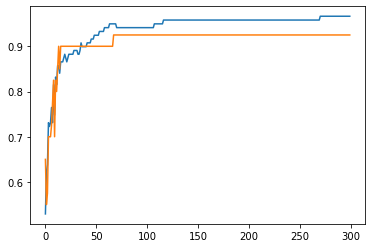

In [52]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()

- 100 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있음

- --> 100 번이 적당해 보임

In [53]:
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


- **힌지 손실**: **서포트 벡터 머신**이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수



In [54]:
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


---

## 점진적 학습을 위한 확률적 경사 하강법

- 확률적 경사 하강법은 훈련이 반복될수록 훈련 세트에 점점 더 잘 맞게 되어 어느 순간 과대적합되고 테스트 세트의 정확도가 줄어듬

- 확률적 경사 하강법을 통해 데이터를 조금씩 사용해 점진적으로 학습하는 수단으로 사용 (컴퓨터 메모리가 발달하면 안 쓰이게 될?)
